<a href="https://colab.research.google.com/github/HarshaliG08/Task7/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3

# Connect SQLite database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert some sample data
sample_data = [
    ('Apples', 10, 2.0),
    ('Bananas', 5, 1.5),
    ('Oranges', 8, 1.8),
    ('Apples', 7, 2.0),
    ('Bananas', 3, 1.5),
    ('Oranges', 4, 1.8)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()
conn.close()


In [ ]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('sales_data.db')

# Run SQL query
query = '''
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Load result
df = pd.read_sql_query(query, conn)
print(df)

conn.close()


   product  total_qty  revenue
0   Apples         17     34.0
1  Bananas          8     12.0
2  Oranges         12     21.6


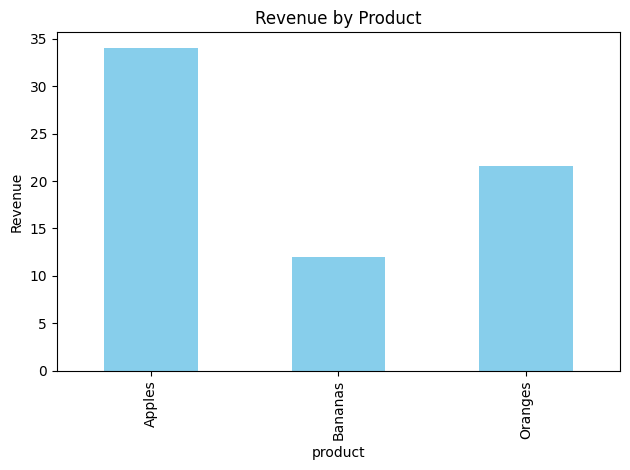

In [ ]:
import matplotlib.pyplot as plt

# Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
